# 1. Attribute selection in classification problems

### Curse of dimensionality

**Question** What is "curse of dimensionality"? What does it mean in practice?

**Question** How can we reduce the number of attributes in classification problems?


Download file seizure.csv containing information about the recording of brain activity of people (description of the dataset: https://archive.ics.uci.edu/dataset/388/epileptic+seizure+recognition).
Each row contains 178 subsequent EEG measurements conducted during 1 second (column), the last column represents the label y {1,2,3,4,5} (subjects in class 1 have epileptic seizure, other classes represent different control groups, such as eyes open (5), or eyes closed (4)).

The train and test split and normalization is already done. 
Your task is to classify the given data with k-NN with k=3 (as during previous laboratories) and measure the accuracy.

Next, try to eliminate redundant attributes. Reduce the number of attributes to 30. Use the SelectKBest class. Remember to fit it only on train data. To reduce the test data to obtain only remained parameters use transform method on fit SelectKBest object. Use mutual_info_classif measure to assess the relevance of attributes.


In [61]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif

data = pd.read_csv("seizure.csv")
data_Y = data["y"]
data = data.drop(columns=["Name", "y"])

X_train, X_test, y_train, y_test = train_test_split(data, data_Y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Train k-NN with k=3 on the full dataset
knn_full = KNeighborsClassifier(n_neighbors=3)
knn_full.fit(X_train, y_train)
y_pred_full = knn_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy with all features: {accuracy_full}")

# Feature selection to reduce attributes to 30
selector = SelectKBest(score_func=mutual_info_classif, k=30)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# Re-train and evaluate k-NN on the reduced feature set
knn_reduced = KNeighborsClassifier(n_neighbors=3)
knn_reduced.fit(X_train_reduced, y_train)
y_pred_reduced = knn_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"Accuracy with 30 selected features: {accuracy_reduced}")

Accuracy with all features: 0.4785243741765481
Accuracy with 30 selected features: 0.47799736495388667


In the exercise above we set the number of features arbitrarily. 

**Question** How can we find the optimal number of attributes in machine learning problems?

# 2. Clustering

**Question** What is clustering? What can we achieve with clustering?

**Question** What clustering algorithms do you know?

# 3. K-means algorithm

**Question** What are the following steps of the k-means algorithm?

**Question** How can we choose the initial clusters?


**Exercise**
Given the following examples of grades od 5 students we want to divide them into 2 groups:

| Subject | A   | B   |
|---------|-----|-----|
| 1       | 1.0 | 1.0 |
| 2       | 1.5 | 2.0 |
| 3       | 3.0 | 3.0 |
| 4       | 5.0 | 7.0 |
| 5       | 3.5 | 5.0 |

We have chosen the two furthest students (using euclidean distance) as the initial clusters' centroids:

|Cluster|Centroid|A  |B  |
|-------|--------|---|---|
|C1     |k1      |1.0|1.0|
|C2     |k2      |5.0|7.0|

Perform the first iteration of k-means: divide all students into clusters and find the centroids of these clusters.


**Question** When the algorithm should stop?

**Question** What advantages and disadvantages of k-means clustering can you find?

# 4. K-means with scikit-learn

### 4.1. Download files mouse.csv and lines.csv. They have multiple examples described with 2 attributes.  You are given the functions to read files and plot the data. Use these functions to plot data from both files. Can you manually determine 3 clusters in each of the files?

In [63]:
import csv
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

def read_file(path):
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
        data = [row for row in reader]
        data = StandardScaler().fit_transform(data)
    return np.array(data)

def plot_data(data):
    plt.scatter(data[:,0], data[:, 1])
    plt.show()

Mouse Data Plot:


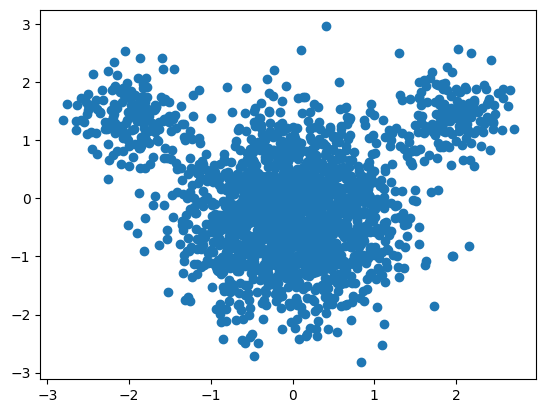

Lines Data Plot:


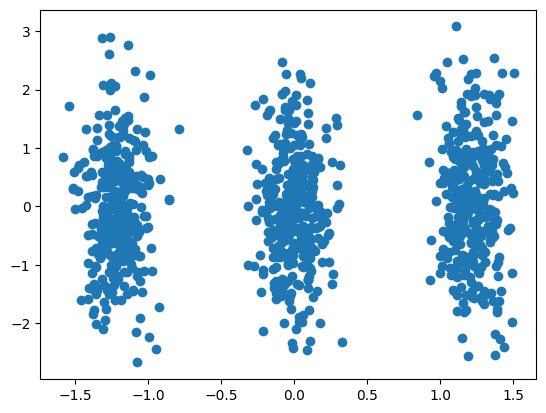

In [64]:
mouse_data = read_file("mouse.csv")
lines_data = read_file("lines.csv")

print("Mouse Data Plot:")
plot_data(mouse_data)

print("Lines Data Plot:")
plot_data(lines_data)

### 4.2 Now, let's try to use k-means on the obtained dataset. Again, you are given a function to visualize the obtained plot. Your task is to use KMeans with propoer parameters on "mouse" and "lines" datasets and see if the clusters generated by k-means are the same that you suggested in the previous exercise.

See documentation and examples: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [65]:
def visualize_clusters(clusters, centroids): 
    #clusters: list of numpy arrays (each array with examples in one cluster)
    #centroids: numpy array
    for c in clusters:
        plt.scatter(c[:,0], c[:,1])
    plt.scatter(centroids[:,0], centroids[:,1], marker='+', color='black', s=100)
    plt.show()

Mouse Dataset Clusters:


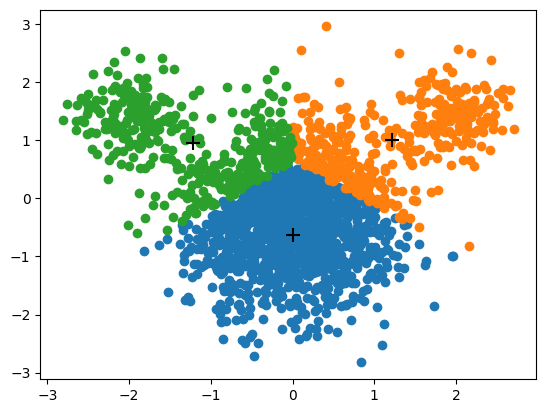

Lines Dataset Clusters:


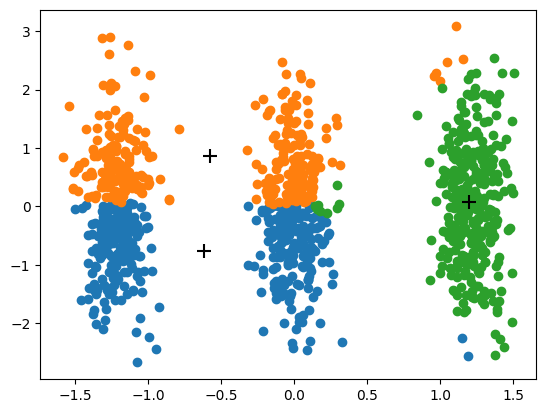

In [66]:
from sklearn.cluster import KMeans

# Mouse dataset
kmeans_mouse = KMeans(n_clusters=3, random_state=42)
mouse_clusters = kmeans_mouse.fit_predict(mouse_data)
mouse_centroids = kmeans_mouse.cluster_centers_

# Organize clusters for visualization
mouse_clustered_data = [mouse_data[mouse_clusters == i] for i in range(3)]

# Visualize
print("Mouse Dataset Clusters:")
visualize_clusters(mouse_clustered_data, mouse_centroids)

# Lines dataset
kmeans_lines = KMeans(n_clusters=3, random_state=42)
lines_clusters = kmeans_lines.fit_predict(lines_data)
lines_centroids = kmeans_lines.cluster_centers_

# Organize clusters for visualization
lines_clustered_data = [lines_data[lines_clusters == i] for i in range(3)]

# Visualize
print("Lines Dataset Clusters:")
visualize_clusters(lines_clustered_data, lines_centroids)


# 5. Attribute selection in unsupervised problems

As in unsupervised learning problems (such as clustering) we do not have decision classess, so attribute selection methods based on info gain, chi2 etc. are not applicable here.

**Question** What can we do when we want to reduce the number of features in unsupervised problems?

We will try to use two attribute selection methods, which can be used in clustering (unsupervised learning): removing low-variance attributes and removing correlated attributes.

You are given code which reads real-world dataset containing data about customers and saves it in 'data' data frame. 

**Task** Perform attribute selection using the methods above. Firstly, you can use VarianceThreshold class (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html). Try different values of threashold and compare how many attributes have been removed. Next, you can use corr() method of DataFrame to obtain the correlation matrix. What can we deduce from this matrix? How can we use it to feature selection? Try to implement proper attribute selection based on correlations.

In [67]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

data = pd.read_csv("customers.csv")
data = data.drop(columns="Address")
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [68]:
# Step 1: Removing Low-Variance Attributes
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3]
for threshold in thresholds:
    var_thresh = VarianceThreshold(threshold=threshold)
    data_filtered = var_thresh.fit_transform(data)
    print(f"Threshold: {threshold}, Original number of features: {data.shape[1]}, "
          f"Reduced number of features: {data_filtered.shape[1]}")

# Step 2: Removing Correlated Attributes
correlation_matrix = data.corr()

# Display the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Step 3: Identify correlated attributes
# Set a threshold for correlation
correlation_threshold = 0.5

# Find features to drop
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

print(f"Features to drop due to correlation: {to_drop}")

# Drop correlated features from the original data
data_reduced = data.drop(columns=to_drop)
print(f"Number of features after removing correlated attributes: {data_reduced.shape[1]}")


Threshold: 0.01, Original number of features: 9, Reduced number of features: 9
Threshold: 0.05, Original number of features: 9, Reduced number of features: 9
Threshold: 0.1, Original number of features: 9, Reduced number of features: 9
Threshold: 0.2, Original number of features: 9, Reduced number of features: 8
Threshold: 0.3, Original number of features: 9, Reduced number of features: 8
Correlation matrix:
                 Customer Id       Age       Edu  Years Employed    Income  \
Customer Id         1.000000 -0.004447 -0.031113       -0.035146 -0.017675   
Age                -0.004447  1.000000  0.012983        0.554241  0.476218   
Edu                -0.031113  0.012983  1.000000       -0.151117  0.218219   
Years Employed     -0.035146  0.554241 -0.151117        1.000000  0.625093   
Income             -0.017675  0.476218  0.218219        0.625093  1.000000   
Card Debt           0.001015  0.278912  0.099081        0.381744  0.551510   
Other Debt         -0.009061  0.337839  0.

# Homework

* Write your own implementation of k-means algorithm with random centroid initialization and 2 stopping conditions: max iterations and centroid convergence (if all attributes of all centroids changes not more than some epsilon the algorithm should stop). 
* Use your implementation to cluster data about cereal products with their dietary characteristics (cereals.csv, 16 attributes). 
* It contains some nominal attributes (name, mfr, type). You can omit the first two of them. Type attribute is binary, so you can replace it with values 0 and 1.
* Perform the clustering of the cereals into 3 groups using k-means algorithm. 
* Remember to preprocess the data: normalization/standardization, attribute selection. 
* Try to describe the obtained groups based on the obtained centroids. What do all cereals within a certain group have in common?
* Write a report containing information about preprocessing methods that you used, number of cereals within each cluster, and your conclusions about the clustering results.

**Deadline +2 weeks**

## Preprocessing

I removed nominal attributes (such as 'name,' which should not influence the clusters) and converted 'type' to binary values. Next I also removed highly correlated columns and dropped the column with the lower variance.
Finally I applied normalization and standardization to all the data.

In [99]:
def preprocess_cereal_data(correlation_threshold=0.8):
    data = pd.read_csv("cereal.csv")
    data = data.drop(columns=["name", "mfr"])
    data['type'] = data['type'].map({'C': 1, 'H': 0})
    
    # Remove correlated attributes
    correlation_matrix = data.corr()
    to_drop = set()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
                # Identify the columns to drop based on variance
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                var_i = data[colname_i].var()
                var_j = data[colname_j].var()
                
                # Remove the column with lower variance
                if var_i < var_j:
                    to_drop.add(colname_i)
                else:
                    to_drop.add(colname_j)

    data_reduced = data.drop(columns=to_drop)
    
    #Normalize the data
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data_reduced)
    attribute_names = data_reduced.columns.tolist()
    print(f"Features removed due to high correlation: {len(to_drop)}")
    print(f"Remaining features: {len(attribute_names)}")
    
    return data_normalized, attribute_names

## Variables and parameters explaination
- DATA - test data set, a vector of n 2d points: [[x1, y1], ..., [xn, yn]], loaded from cereal.csv and preprocessed by preprocess_cereal_data()
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

## Helper functions

In [100]:
def getEuclideanDistance(A, B):
    squared = 0.0
    for i in range(len(A)):
        squared += (A[i] - B[i]) ** 2
    return squared ** (1 / 2)

def getCentroids(K, data):
    np.random.shuffle(data)
    centroids = data[:K]
    return centroids

In [104]:
def doKMeansStep(DATA, K, CENTROIDS, ASSIGNMENTS, EPSILON=0.005):
    NO_CHANGE = True
    ATTRIBUTE_COUNT = np.array(DATA).shape[1]
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for _ in range(K)]
    for i in range(len(DATA)):
        distances = [getEuclideanDistance(DATA[i], centroid) for centroid in CENTROIDS]
        closest_index = distances.index(min(distances))
        NEW_ASSIGNMENTS[closest_index].append(i)

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    for k in range(K):  
        centroid_sum = [0] * ATTRIBUTE_COUNT
        for data_index in NEW_ASSIGNMENTS[k]:
            for m in range(ATTRIBUTE_COUNT):
                centroid_sum[m] += DATA[data_index][m]
        centroid = []
        for coordinate_sum in centroid_sum:
            if(len(NEW_ASSIGNMENTS[k])>0):
                centroid.append(coordinate_sum / len(NEW_ASSIGNMENTS[k]))
            else:
                centroid.append(DATA[0])
        centroid = [coordinate_sum / len(NEW_ASSIGNMENTS[k]) for coordinate_sum in centroid_sum]
        NEW_CENTROIDS.append(centroid)
    
    if ASSIGNMENTS is None:
        NO_CHANGE = False
    else:
        #NO_CHANGE = (ASSIGNMENTS == NEW_ASSIGNMENTS)
        # Check if centroids have converged within EPSILON margin
        centroid_shift = [getEuclideanDistance(NEW_CENTROIDS[i], CENTROIDS[i]) for i in range(K)]
        NO_CHANGE = all(shift <= EPSILON for shift in centroid_shift)
    
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS

def calculate_cluster_stats(DATA, ASSIGNMENTS, attribute_names):
    cluster_stats = []
    
    for cluster_idx, centroid_indices in enumerate(ASSIGNMENTS):
        cluster_data = DATA[centroid_indices]
        cluster_mean = np.mean(cluster_data, axis=0)
        cluster_max = np.max(cluster_data, axis=0)
        cluster_min = np.min(cluster_data, axis=0)
        cluster_std = np.std(cluster_data, axis=0)

        stats = {'Cluster Index': cluster_idx}
        
        # Add statistics for each attribute
        for i, attr in enumerate(attribute_names):
            stats[f'{attr} Mean'] = cluster_mean[i]
            stats[f'{attr} Max'] = cluster_max[i]
            stats[f'{attr} Min'] = cluster_min[i]
            stats[f'{attr} Std Dev'] = cluster_std[i]
        
        cluster_stats.append(stats)
    
    return cluster_stats


def doKMeans(K = 3, MAX_ITER = 100, EPSILON = 0.005):
    DATA, attribute_names = preprocess_cereal_data()
    CENTROIDS = getCentroids(K, DATA)
    ASSIGNMENTS = [[] for i in range(K)] 
    for i in range(MAX_ITER):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, K, CENTROIDS, ASSIGNMENTS, EPSILON)
        if(NO_CHANGE == True):
            break
    print(f"Stopped after {i} Iterations")
    cluster_stats = calculate_cluster_stats(DATA, ASSIGNMENTS, attribute_names)
    df = pd.DataFrame(cluster_stats)
    df_formatted = df.set_index('Cluster Index').T
    print(df_formatted)
    return ASSIGNMENTS

In [105]:
ASSIGNMENTS = doKMeans(K=3, MAX_ITER=100, EPSILON=0.005)

Features removed due to high correlation: 1
Remaining features: 13
Stopped after 4 Iterations
Cluster Index            0         1         2
type Mean         0.201347  0.201347 -0.906061
type Max          0.201347  0.201347  0.201347
type Min          0.201347  0.201347 -4.966555
type Std Dev      0.000000  0.000000  2.120524
calories Mean     0.545161 -0.097283 -1.351892
calories Max      2.744040  1.710832 -0.355585
calories Min     -0.355585 -0.872189 -2.938605
calories Std Dev  0.718480  0.516604  0.965773
protein Mean     -0.265749  0.188061  0.417912
protein Max       1.337319  3.176134  2.256726
protein Min      -1.420902 -1.420902 -1.420902
protein Std Dev   0.876390  1.069902  0.982888
fat Mean          0.499876 -0.429690 -0.655899
fat Max           3.987349  0.987096  0.987096
fat Min          -1.013072 -1.013072 -1.013072
fat Std Dev       1.059160  0.571353  0.610337
sodium Mean       0.051618  0.721805 -1.381172
sodium Max        1.444714  1.924986  1.204578
sodium Min   

## Cluster Analysis

In [106]:
# Print the number of cereals in each cluster
for i, cluster in enumerate(ASSIGNMENTS):
    print(f"Cluster {i}: {len(cluster)} cereals")

Cluster 0: 39 cereals
Cluster 1: 24 cereals
Cluster 2: 14 cereals


### Cluster 0:
- **Type Mean**: 0.201347 (Cereals are predominantly cold)
- **Calories Mean**: 0.545161 (Moderate calorie content)
- **Protein Mean**: -0.265749 (Lower protein content)
- **Sugars Mean**: 0.818941 (Higher sugar content)
- **Cups Mean**: -0.115398 (Average serving size)

**Common Characteristics**: Cereals in this cluster tend to be cold cereals with moderate calorie counts but high sugar levels. They typically have lower protein content.

### Cluster 1:
- **Type Mean**: 0.201347 (Also predominantly cold cereals)
- **Calories Mean**: -0.097283 (Lower calorie content compared to Cluster 0)
- **Protein Mean**: 0.188061 (Higher protein content)
- **Sugars Mean**: -0.708891 (Lower sugar content)
- **Weight Mean**: -0.114453 (Slightly lower average weight)

**Common Characteristics**: This group consists of cold cereals that are lower in calories and sugars but have higher protein content, making them potentially healthier options for consumers.

### Cluster 2:
- **Type Mean**: -0.906061 (Cereals are primarily hot)
- **Calories Mean**: -1.351892 (Significantly higher calorie content)
- **Sugars Mean**: -1.066093 (Lowest sugar content among all clusters)
- **Weight Mean**: -0.757087 (Average weight is low)

**Common Characteristics**: This cluster represents hot cereals with high calorie content but lower sugar levels. These cereals might be more filling and nutritious, appealing to those looking for a hearty breakfast.


## Summary

The analysis of the three identified clusters indicates that they are distinguishable and meaningful to humans, demonstrating that the clustering algorithm effectively captured the underlying patterns in the cereal data. However, it is important to note that the performance of the algorithm is highly dependent on the initial centroids. In some cases, it may fail spectacularly, leading to suboptimal clustering results.

To enhance clustering performance and achieve better results, alternative algorithms such as Density-Based Spatial Clustering of Applications with Noise (DBSCAN) could be employed. DBSCAN is particularly advantageous for datasets with varying densities and can identify clusters of arbitrary shape, which may provide a more robust clustering solution.
